# Case Study: Breast Cancer Prediction
To predict the severity of mass lesion using mammography technique

Load the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GB
from xgboost import XGBClassifier as XGB
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay

Enter the file paths from local host where train data and test data is saved

In [2]:
#Enter the file paths from local host where train data and test data is saved
#filePathTrainData = "D:/FedEx Problem Statement/ML problem/Train.xlsx"
#filePathTestData = "D:/FedEx Problem Statement/ML problem/Test.xlsx"
filePathTrainData = ""
filePathTestData = ""

Load the train data

In [3]:
#Load the train data
trainData = pd.read_excel(filePathTrainData)
trainData.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1


In [4]:
#Remove the index variable from train Data
trainData = trainData.drop("Index",axis=1)
trainData.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
1,4.0,43.0,round,circumscribed,NaN,1
2,5.0,58.0,irregular,spiculated,low,1
3,4.0,28.0,round,circumscribed,low,0
4,5.0,74.0,round,spiculated,NaN,1


In [5]:
#Check the size of the train data
trainData.shape

(811, 6)

# Data Preprocessing

Exploratory Data Analysis

<AxesSubplot:xlabel='BI_RADS', ylabel='count'>

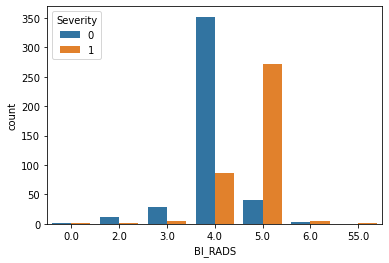

In [6]:
#Distribution of BI_RADS as against the Severity
sns.countplot(x="BI_RADS",hue="Severity",data=trainData)
#plt.savefig("D:/FedEx Problem Statement/Images/BI_RADS.jpg")

<AxesSubplot:xlabel='Shape', ylabel='count'>

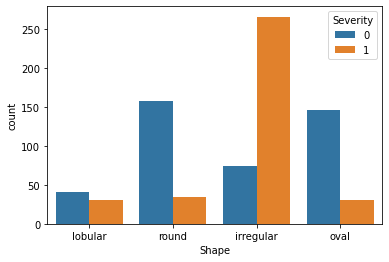

In [7]:
#Distribution of Shape as against the Severity
sns.countplot(x="Shape",hue="Severity",data=trainData)
#plt.savefig("D:/FedEx Problem Statement/Images/Shape.jpg")

<AxesSubplot:xlabel='Mass_Density', ylabel='count'>

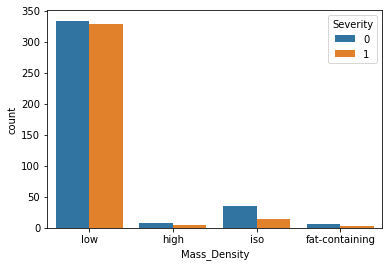

In [8]:
#Distribution of Mass_Density as against the Severity
sns.countplot(x="Mass_Density",hue="Severity",data=trainData)
#plt.savefig("D:/FedEx Problem Statement/Images/Mass_Density.jpg")

<AxesSubplot:xlabel='Margin', ylabel='count'>

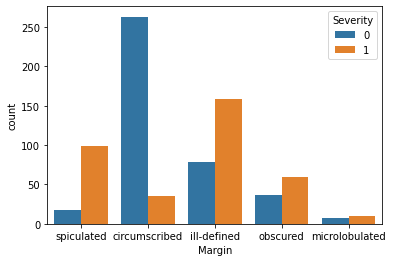

In [9]:
#Distribution of Margin as against the Severity
sns.countplot(x="Margin",hue="Severity",data=trainData)
#plt.savefig("D:/FedEx Problem Statement/Images/Margin.jpg")

Missing values and outliers treatment

Remove the missing values and compute the outliers

In [10]:
#Checking the missing values in each column of data set
trainData.isna().sum()

BI_RADS          2
Age             88
Shape           30
Margin          47
Mass_Density    76
Severity         0
dtype: int64

<AxesSubplot:>

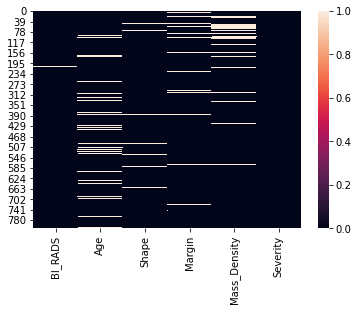

In [11]:
#Visualizing the missing values using heat map
sns.heatmap(trainData.isna())
#plt.savefig("D:/FedEx Problem Statement/Images/heatmap_missing_values.jpg")

In [12]:
#Removing the missing values
trainDataRemoveMissingValues = trainData.dropna()

In [13]:
#Checking the missing values
trainDataRemoveMissingValues.isna().sum()

BI_RADS         0
Age             0
Shape           0
Margin          0
Mass_Density    0
Severity        0
dtype: int64

<AxesSubplot:>

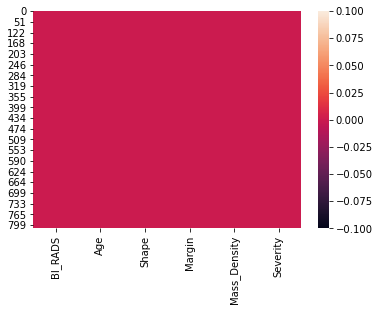

In [14]:
#Visualizing the missing values
sns.heatmap(trainDataRemoveMissingValues.isna())

BI_RADS
0.0       2
2.0       6
3.0      22
4.0     321
5.0     251
6.0       7
55.0      1
Name: BI_RADS, dtype: int64

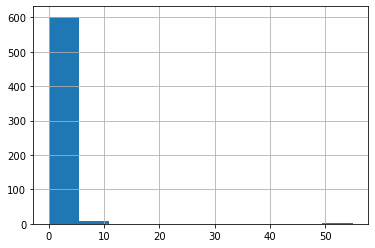

In [15]:
# Checking the outliers in the data    
#BI_RADS
(trainDataRemoveMissingValues.loc[:,"BI_RADS"]).hist()
(trainDataRemoveMissingValues.groupby("BI_RADS")["BI_RADS"]).count()
#plt.savefig("D:/FedEx Problem Statement/Images/BI_RADS_distribution.jpg")

25th Quartile: 45.0
75th Quartile: 67.0
Rows with observations above Upper Bound: (array([ 59,  67,  91, 112, 219, 322, 410, 426, 437], dtype=int64),)
Rows withg observations below lower Bound: (array([354, 454, 582, 603, 605], dtype=int64),)
Total Outliers: 14
Outliers in Age Column:  119    130.0
132    130.0
169    130.0
195    130.0
330    130.0
466    130.0
578    130.0
596    130.0
609    130.0
503      5.0
629      5.0
780      5.0
802      5.0
805      5.0
Name: Age, dtype: float64


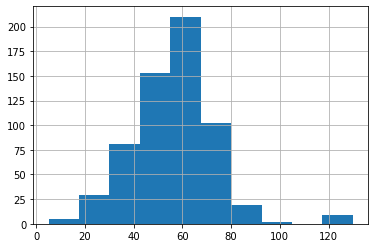

In [16]:
#Age
(trainDataRemoveMissingValues.loc[:,"Age"]).hist()
#plt.savefig("D:/FedEx Problem Statement/Images/Age_distribution.jpg")

#Computing the outliers and and count its numbers using IQR method
q1 = np.percentile(trainDataRemoveMissingValues['Age'],25)
print("25th Quartile:", q1)
q3 = np.percentile(trainDataRemoveMissingValues['Age'],75)
print("75th Quartile:", q3)
IQR = q3 - q1
upper = q3 + (1.5*IQR)
lower = q1 - (1.5*IQR)
upperOutliers = np.where(trainDataRemoveMissingValues.loc[:,"Age"]>=upper)
print("Rows with observations above Upper Bound:", upperOutliers)
lowerOutliers = np.where(trainDataRemoveMissingValues.loc[:,"Age"]<=lower)
print("Rows withg observations below lower Bound:", lowerOutliers)
outliers = np.append(upperOutliers[0],list(lowerOutliers[0])) 
print("Total Outliers:", len(outliers))
print("Outliers in Age Column: ", trainDataRemoveMissingValues.iloc[outliers,1])

Shape
irregular    288
lobular       55
oval         127
round        140
Name: Shape, dtype: int64

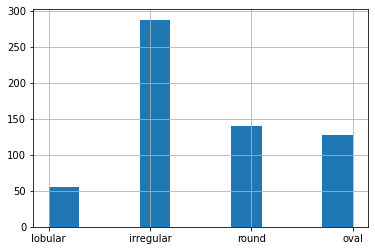

In [17]:
#Shape
(trainDataRemoveMissingValues.loc[:,"Shape"]).hist()
#Counting the distribution of categories in Shape
(trainDataRemoveMissingValues.groupby("Shape")["Shape"]).count()

Margin
circumscribed     229
ill-defined       188
microlobulated     15
obscured           82
spiculated         96
Name: Margin, dtype: int64

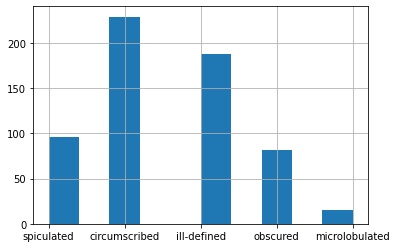

In [18]:
#Margin
(trainDataRemoveMissingValues.loc[:,"Margin"]).hist()
#Counting the distribution of categories in Margin
(trainDataRemoveMissingValues.groupby("Margin")["Margin"]).count()

Mass_Density
fat-containing      7
high                7
iso                41
low               555
Name: Mass_Density, dtype: int64

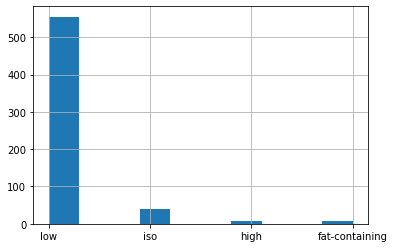

In [19]:
#Mass_Density
(trainDataRemoveMissingValues.loc[:,"Mass_Density"]).hist()
#Counting the distribution of categories in Marss_Density
(trainDataRemoveMissingValues.groupby("Mass_Density")["Mass_Density"]).count()

In [20]:
#Replacing the missing values with mean for continuous variable and most frequently occured class for categorical
trainDataReplaceMissingValues = trainData
imp_categorical = SimpleImputer(strategy="most_frequent")
imp_continuous = SimpleImputer(strategy="mean")
trainDataReplaceMissingValues.loc[:,"BI_RADS"]=imp_categorical.fit_transform(((trainDataReplaceMissingValues.loc[:,"BI_RADS"]).values).reshape(-1,1))
trainDataReplaceMissingValues.loc[:,"Age"]=imp_continuous.fit_transform(((trainDataReplaceMissingValues.loc[:,"Age"]).values).reshape(-1,1))
trainDataReplaceMissingValues.loc[:,"Shape"]=imp_categorical.fit_transform(((trainDataReplaceMissingValues.loc[:,"Shape"]).values).reshape(-1,1))
trainDataReplaceMissingValues.loc[:,"Margin"]=imp_categorical.fit_transform(((trainDataReplaceMissingValues.loc[:,"Margin"]).values).reshape(-1,1))
trainDataReplaceMissingValues.loc[:,"Mass_Density"]=imp_categorical.fit_transform(((trainDataReplaceMissingValues.loc[:,"Mass_Density"]).values).reshape(-1,1))
trainDataReplaceMissingValues.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
1,4.0,43.0,round,circumscribed,low,1
2,5.0,58.0,irregular,spiculated,low,1
3,4.0,28.0,round,circumscribed,low,0
4,5.0,74.0,round,spiculated,low,1


<AxesSubplot:>

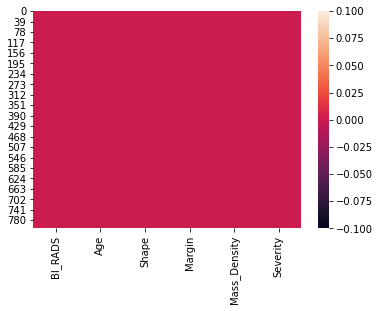

In [21]:
#Visualize the data
sns.heatmap(trainData.isna())
#plt.savefig("D:/FedEx Problem Statement/Images/heatmap_after_removing_missing_values.jpg")

BI_RADS
0.0       3
2.0      13
3.0      34
4.0     440
5.0     312
6.0       8
55.0      1
Name: BI_RADS, dtype: int64

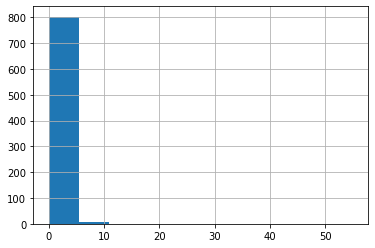

In [22]:
# Checking the outliers in the data    
#BI_RADS
(trainDataReplaceMissingValues.loc[:,"BI_RADS"]).hist()
#plt.savefig("D:/FedEx Problem Statement/Images/BI_RADS_distribution_replace_missing_values.jpg")

#Counting the distribution of categories in BI_RADs
(trainDataReplaceMissingValues.groupby("BI_RADS")["BI_RADS"]).count()


25th Quartile: 45.0
75th Quartile: 67.0
Rows with observations above Upper Bound: (array([119, 132, 169, 195, 330, 466, 578, 596, 609, 726], dtype=int64),)
Rows with observations below lower Bound: (array([460, 503, 629, 780, 802, 805], dtype=int64),)
Total Outliers: 16
Outliers in Age Column:  119    130.0
132    130.0
169    130.0
195    130.0
330    130.0
466    130.0
578    130.0
596    130.0
609    130.0
726     96.0
460      5.0
503      5.0
629      5.0
780      5.0
802      5.0
805      5.0
Name: Age, dtype: float64


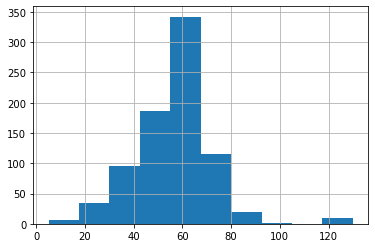

In [23]:
#Age
(trainDataReplaceMissingValues.loc[:,"Age"]).hist()
#plt.savefig("D:/FedEx Problem Statement/Images/Age_distribution_replace_missing_values.jpg")

#Computing the outliers and and count its numbers using IQR method
q11 = np.percentile(trainDataReplaceMissingValues['Age'],25)
print("25th Quartile:", q1)
q13 = np.percentile(trainDataReplaceMissingValues['Age'],75)
print("75th Quartile:", q3)
IQR1 = q13 - q11
upper1 = q13 + (1.5*IQR1)
lower1 = q11 - (1.5*IQR1)
upperOutliers1 = np.where(trainDataReplaceMissingValues.loc[:,"Age"]>=upper1)
print("Rows with observations above Upper Bound:", upperOutliers1)
lowerOutliers1 = np.where(trainDataReplaceMissingValues.loc[:,"Age"]<=lower1)
print("Rows with observations below lower Bound:", lowerOutliers1)
outliers1 = np.append(upperOutliers1[0],list(lowerOutliers1[0])) 
print("Total Outliers:", len(outliers1))
print("Outliers in Age Column: ", trainDataReplaceMissingValues.iloc[outliers1,1])

Shape
irregular    370
lobular       72
oval         177
round        192
Name: Shape, dtype: int64

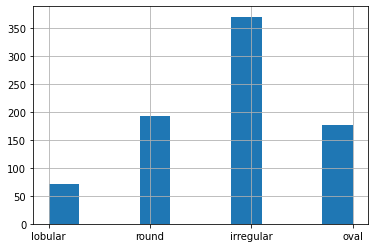

In [24]:
#Shape
(trainDataReplaceMissingValues.loc[:,"Shape"]).hist()
#Counting the distribution of categories in Shape
(trainDataReplaceMissingValues.groupby("Shape")["Shape"]).count()

Margin
circumscribed     345
ill-defined       236
microlobulated     17
obscured           97
spiculated        116
Name: Margin, dtype: int64

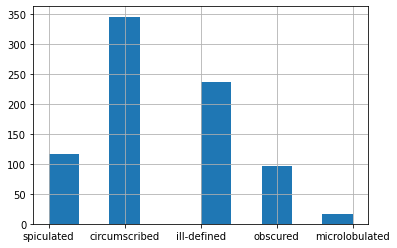

In [25]:
#Margin
(trainDataReplaceMissingValues.loc[:,"Margin"]).hist()
#Counting the distribution of categories in Margin
(trainDataReplaceMissingValues.groupby("Margin")["Margin"]).count()

Mass_Density
fat-containing     10
high               13
iso                49
low               739
Name: Mass_Density, dtype: int64

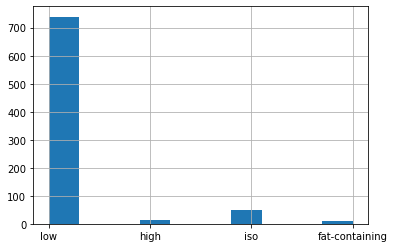

In [26]:
#Mass_Density
(trainDataReplaceMissingValues.loc[:,"Mass_Density"]).hist()
#Counting the distribution of categories in Mass_Density
(trainDataReplaceMissingValues.groupby("Mass_Density")["Mass_Density"]).count()

C:\Users\3501\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

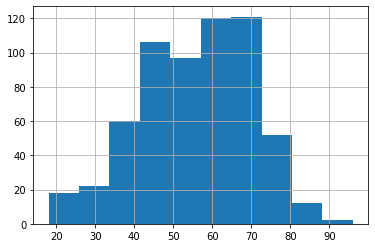

In [27]:
# Define the train data
trainData = trainDataRemoveMissingValues

#Replace the outliers in "Age" using Quantile based flooring and capping
twentyfifth_percentile = np.percentile(trainData['Age'], 25)
seventyfifth_percentile = np.percentile(trainData['Age'], 75)
trainData.iloc[list(lowerOutliers[0]),1] = 0
trainData.iloc[list(upperOutliers[0]),1] = 0
trainData.iloc[list(lowerOutliers[0]),1] = twentyfifth_percentile
trainData.iloc[list(upperOutliers[0]),1] = seventyfifth_percentile

#Histogram Plot for Age
(trainData['Age']).hist()
#plt.savefig("D:/FedEx Problem Statement/Images/Age_distribution_replace_outliers.jpg")

In [28]:
trainData.shape

(610, 6)

Distribution of classes in trainData

Severity
0    308
1    302
Name: Severity, dtype: int64

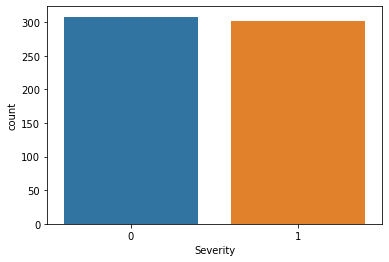

In [29]:
#Distribution of 'Severity' classes in the train data
sns.countplot(x="Severity",data=trainData)
(trainData.groupby("Severity")["Severity"]).count()

Since, the difference between the count of severe class and non severe class is not high, we proceed with current train Data

# Feature Selection

Divide the data into predictors and response variables

In [30]:
#Define Predictors
Xtrain = trainData.drop("Severity",axis=1)
Xtrain.head()

,BI_RADS,Age,Shape,Margin,Mass_Density
0,5.0,67.0,lobular,spiculated,low
2,5.0,58.0,irregular,spiculated,low
3,4.0,28.0,round,circumscribed,low
8,5.0,57.0,round,spiculated,low
10,5.0,76.0,round,ill-defined,low


In [31]:
#Define the response
Ytrain = trainData["Severity"]
Ytrain.shape

(610,)

Generating dummy variables for categorical variables using one hot encoding

In [32]:
# Generate dummy variables for BI_RADS
birads = pd.get_dummies(Xtrain["BI_RADS"],prefix="BI_RADS")
birads.head()

,BI_RADS_0.0,BI_RADS_2.0,BI_RADS_3.0,BI_RADS_4.0,BI_RADS_5.0,BI_RADS_6.0,BI_RADS_55.0
0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
8,0,0,0,0,1,0,0
10,0,0,0,0,1,0,0


In [33]:
# Generate dummy variables for Shape
shape = pd.get_dummies(Xtrain["Shape"],prefix="shape")
shape.head()

,shape_irregular,shape_lobular,shape_oval,shape_round
0,0,1,0,0
2,1,0,0,0
3,0,0,0,1
8,0,0,0,1
10,0,0,0,1


In [34]:
# Generate dummy variables for Margin
margin = pd.get_dummies(Xtrain["Margin"],prefix="margin")
margin.head()

,margin_circumscribed,margin_ill-defined,margin_microlobulated,margin_obscured,margin_spiculated
0,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
8,0,0,0,0,1
10,0,1,0,0,0


In [35]:
# Generate dummy variables for Mass_density
mass_density = pd.get_dummies(Xtrain["Mass_Density"],prefix="mass_density")
mass_density.head()

,mass_density_fat-containing,mass_density_high,mass_density_iso,mass_density_low
0,0,0,0,1
2,0,0,0,1
3,0,0,0,1
8,0,0,0,1
10,0,0,0,1


In [36]:
# Combine the dummy features, Age, and build the predictors dataframe
XtrainCombined = pd.concat([birads,Xtrain["Age"],shape,margin,mass_density],axis=1)
XtrainCombined.head()

,BI_RADS_0.0,BI_RADS_2.0,BI_RADS_3.0,BI_RADS_4.0,BI_RADS_5.0,BI_RADS_6.0,BI_RADS_55.0,Age,shape_irregular,shape_lobular,...,shape_round,margin_circumscribed,margin_ill-defined,margin_microlobulated,margin_obscured,margin_spiculated,mass_density_fat-containing,mass_density_high,mass_density_iso,mass_density_low
0,0,0,0,0,1,0,0,67.0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,58.0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,28.0,0,0,...,1,1,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,0,57.0,0,0,...,1,0,0,0,0,1,0,0,0,1
10,0,0,0,0,1,0,0,76.0,0,0,...,1,0,1,0,0,0,0,0,0,1


Feature Selection: Chisquare Test

Text(0.5, 1.0, 'chi squared test base on p value')

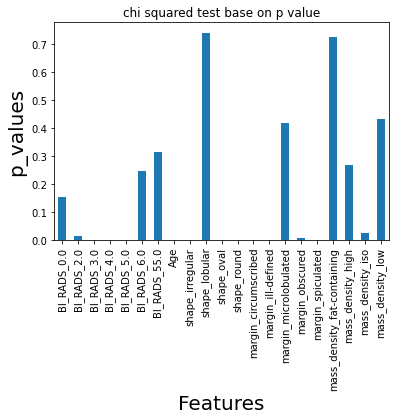

In [37]:
#Perform chi square test for feature selection
fScore = chi2(XtrainCombined, Ytrain)
pValue=pd.Series(fScore[1],index=XtrainCombined.columns)
pValue.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
#plt.savefig("D:/FedEx Problem Statement/Images/chi_2_test.jpg")

In [38]:
#Selecting the best feature based on pvalue<=0.05
BestFeatures = (XtrainCombined.columns)[pValue<=0.05]
XtrainBest = XtrainCombined[BestFeatures]
XtrainBest.head()

,BI_RADS_2.0,BI_RADS_3.0,BI_RADS_4.0,BI_RADS_5.0,Age,shape_irregular,shape_oval,shape_round,margin_circumscribed,margin_ill-defined,margin_obscured,margin_spiculated,mass_density_iso
0,0,0,0,1,67.0,0,0,0,0,0,0,1,0
2,0,0,0,1,58.0,1,0,0,0,0,0,1,0
3,0,0,1,0,28.0,0,0,1,1,0,0,0,0
8,0,0,0,1,57.0,0,0,1,0,0,0,1,0
10,0,0,0,1,76.0,0,0,1,0,1,0,0,0


# Model Selection

In [39]:
#Scaling the Features:
#Normalizing the age values between 0 and 1, since the values of all other columns is in between 0 and 1
scaler = MinMaxScaler()
XtrainBestFit=scaler.fit(XtrainBest)
XtrainBestScaled = scaler.transform(XtrainBest)
pd.DataFrame(XtrainBestScaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.628205,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.512821,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.128205,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.743590,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [40]:
# Splitting the dataset into training and validation
X_train, X_validate, Y_train, Y_validate = train_test_split(XtrainBestScaled, Ytrain, test_size=0.2,random_state=0, stratify=Ytrain)

In [41]:
# Logistic Regression: Model Building, Computing balanced accuracy
modelLR = LR(random_state=0).fit(X_train, Y_train)
Y_train_predictLR = modelLR.predict(X_train)
trainAccuracyScoreLR = balanced_accuracy_score(Y_train, Y_train_predictLR)
print("Train Accuracy LR: ", trainAccuracyScoreLR*100, "%")
Y_validate_predictLR = modelLR.predict(X_validate)
validateAccuracyScoreLR = balanced_accuracy_score(Y_validate, Y_validate_predictLR)
print("Validation Accuracy LR: ", validateAccuracyScoreLR*100, "%")

Train Accuracy LR:  86.05791843042397 %
Validation Accuracy LR:  84.35483870967741 %


In [42]:
# Linear Discriminant Analysis: Model Building, Computing balanced accuracy
modelLDA = LDA().fit(X_train, Y_train)
Y_train_predictLDA = modelLDA.predict(X_train)
trainAccuracyScoreLDA = balanced_accuracy_score(Y_train, Y_train_predictLDA)
print("Train Accuracy LDA: ", trainAccuracyScoreLDA*100, "%")
Y_validate_predictLDA = modelLDA.predict(X_validate)
validateAccuracyScoreLDA = balanced_accuracy_score(Y_validate, Y_validate_predictLDA)
print("Validation Accuracy LDA: ", validateAccuracyScoreLDA*100, "%")

Train Accuracy LDA:  85.21131492306658 %
Validation Accuracy LDA:  85.94086021505376 %


In [43]:
# K Nearest Neighbours: Model Building, Computing balanced accuracy
modelKNN = KNN().fit(X_train, Y_train)
Y_train_predictKNN = modelKNN.predict(X_train)
trainAccuracyScoreKNN = balanced_accuracy_score(Y_train, Y_train_predictKNN)
print("Train Accuracy KNN: ", trainAccuracyScoreKNN*100, "%")
Y_validate_predictKNN = modelKNN.predict(X_validate)
validateAccuracyScoreKNN = balanced_accuracy_score(Y_validate, Y_validate_predictKNN)
print("Validation Accuracy KNN: ", validateAccuracyScoreKNN*100, "%")

Train Accuracy KNN:  86.05455889269636 %
Validation Accuracy KNN:  79.40860215053763 %


In [44]:
# Decision Trees: Model Building, Computing balanced accuracy
modelDT = DT().fit(X_train, Y_train)
Y_train_predictDT = modelDT.predict(X_train)
trainAccuracyScoreDT = balanced_accuracy_score(Y_train, Y_train_predictDT)
print("Train Accuracy DT: ", trainAccuracyScoreDT*100, "%")
Y_validate_predictDT = modelDT.predict(X_validate)
validateAccuracyScoreDT = balanced_accuracy_score(Y_validate, Y_validate_predictDT)
print("Validation Accuracy DT: ", validateAccuracyScoreDT*100, "%")

Train Accuracy DT:  93.63199623731775 %
Validation Accuracy DT:  74.46236559139786 %


In [45]:
# Gaussian Naive Bayes: Model Building, Computing balanced accuracy
modelGNB = GNB().fit(X_train, Y_train)
Y_train_predictGNB = modelGNB.predict(X_train)
trainAccuracyScoreGNB = balanced_accuracy_score(Y_train, Y_train_predictGNB)
print("Train Accuracy GNB: ", trainAccuracyScoreGNB*100, "%")
Y_validate_predictGNB = modelGNB.predict(X_validate)
validateAccuracyScoreGNB = balanced_accuracy_score(Y_validate, Y_validate_predictGNB)
print("Validation Accuracy GNB: ", validateAccuracyScoreGNB*100, "%")

Train Accuracy GNB:  59.13962238795942 %
Validation Accuracy GNB:  62.016129032258064 %


In [46]:
# Support Vector Classifier: Model Building, Computing balanced accuracy
modelSVC = SVC().fit(X_train, Y_train)
Y_train_predictSVC = modelSVC.predict(X_train)
trainAccuracyScoreSVC = balanced_accuracy_score(Y_train, Y_train_predictSVC)
print("Train Accuracy SVC: ", trainAccuracyScoreSVC*100, "%")
Y_validate_predictSVC = modelSVC.predict(X_validate)
validateAccuracyScoreSVC = balanced_accuracy_score(Y_validate, Y_validate_predictSVC)
print("Validation Accuracy SVC: ", validateAccuracyScoreSVC*100, "%")

Train Accuracy SVC:  85.19451723442855 %
Validation Accuracy SVC:  84.3010752688172 %


In [47]:
# Random Forest: Model Building, Computing balanced accuracy
modelRF = RF().fit(X_train, Y_train)
Y_train_predictRF = modelRF.predict(X_train)
trainAccuracyScoreRF = balanced_accuracy_score(Y_train, Y_train_predictRF)
print("Train Accuracy RF: ", trainAccuracyScoreRF*100, "%")
Y_validate_predictRF = modelRF.predict(X_validate)
validateAccuracyScoreRF = balanced_accuracy_score(Y_validate, Y_validate_predictRF)
print("Validation Accuracy RF: ", validateAccuracyScoreRF*100, "%")

Train Accuracy RF:  93.64879392595579 %
Validation Accuracy RF:  81.10215053763442 %


In [48]:
# Gradient Boosting: Model Building, Computing balanced accuracy
modelGB = GB().fit(X_train, Y_train)
Y_train_predictGB = modelGB.predict(X_train)
trainAccuracyScoreGB = balanced_accuracy_score(Y_train, Y_train_predictGB)
print("Train Accuracy GB: ", trainAccuracyScoreGB*100, "%")
Y_validate_predictGB = modelGB.predict(X_validate)
validateAccuracyScoreGB = balanced_accuracy_score(Y_validate, Y_validate_predictGB)
print("Validation Accuracy GB: ", validateAccuracyScoreGB*100, "%")

Train Accuracy GB:  88.73379023046428 %
Validation Accuracy GB:  85.99462365591397 %


In [49]:
# XGBoost: Model Building, Computing balanced accuracy
modelXGB = XGB().fit(X_train, Y_train)
Y_train_predictXGB = modelXGB.predict(X_train)
trainAccuracyScoreXGB = balanced_accuracy_score(Y_train, Y_train_predictXGB)
print("Train Accuracy XGB: ", trainAccuracyScoreXGB*100, "%")
Y_validate_predictXGB = modelXGB.predict(X_validate)
validateAccuracyScoreXGB = balanced_accuracy_score(Y_validate, Y_validate_predictXGB)
print("Validation Accuracy XGB: ", validateAccuracyScoreXGB*100, "%")

Train Accuracy XGB:  92.01269905261036 %
Validation Accuracy XGB:  80.26881720430109 %


In [50]:
# Artificial Neural Networks: Model Building, Computing balanced accuracy
modelANN = ANN().fit(X_train, Y_train)
Y_train_predictANN = modelANN.predict(X_train)
trainAccuracyScoreANN = balanced_accuracy_score(Y_train, Y_train_predictANN)
print("Train Accuracy ANN: ", trainAccuracyScoreANN*100, "%")
Y_validate_predictANN = modelANN.predict(X_validate)
validateAccuracyScoreANN = balanced_accuracy_score(Y_validate, Y_validate_predictANN)
print("Validation Accuracy ANN: ", validateAccuracyScoreANN*100, "%")

Train Accuracy ANN:  86.26788953839952 %
Validation Accuracy ANN:  86.8010752688172 %


C:\Users\3501\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Hyper Parameter Tuning

In [51]:
#Defining the parameters
parameters = {
    "n_estimators":[100,150,200],
    "max_depth":[3,5,7,9],
    "learning_rate":[0.1,1,10,100]
}

#Hyper parameter tuning
cv = GridSearchCV(modelGB,parameters,scoring='balanced_accuracy',cv=5)
cv.fit(XtrainBestScaled, Ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 1, 10, 100],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200]},
             scoring='balanced_accuracy')

In [52]:
#Defining the best parameters
print(cv.best_params_)
optim_learning_rate = cv.best_params_['learning_rate']
optim_max_depth = cv.best_params_['max_depth']
optim_n_estimators = cv.best_params_['n_estimators']

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# Model Building

In [53]:
# Model Building on entire training data
modelGBFinal = GB(learning_rate=optim_learning_rate, max_depth=optim_max_depth, n_estimators=optim_n_estimators).fit(XtrainBestScaled, Ytrain)
Y_train_predictGBFinal = modelGBFinal.predict(XtrainBestScaled)
trainAccuracyScoreGBFinal = balanced_accuracy_score(Ytrain, Y_train_predictGBFinal)
print("Training Accuracy: ", trainAccuracyScoreGBFinal*100,"%")

Training Accuracy:  88.02356583813537 %


# Model Testing

In [54]:
#Load the test data
testData = pd.read_excel(filePathTestData)
testData.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5,65.0,lobular,ill-defined,low,1
1,2,5,74.0,lobular,microlobulated,low,1
2,3,4,NaN,oval,circumscribed,low,0
3,4,4,57.0,irregular,ill-defined,fat-containing,1
4,5,4,76.0,lobular,microlobulated,low,0


In [55]:
#Remove Index variable
testData = testData.drop(["Index"],axis=1)
testData.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5,65.0,lobular,ill-defined,low,1
1,5,74.0,lobular,microlobulated,low,1
2,4,NaN,oval,circumscribed,low,0
3,4,57.0,irregular,ill-defined,fat-containing,1
4,4,76.0,lobular,microlobulated,low,0


<AxesSubplot:>

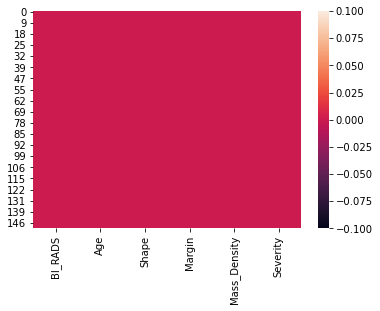

In [56]:
#Remove the Missing Values
testDataRemoveMissingValues = testData.dropna()

#Visualize test data
sns.heatmap(testDataRemoveMissingValues.isna())


25th Quartile: 45.0
75th Quartile: 65.0
Rows with observations above Upper Bound: (array([12, 15, 33], dtype=int64),)
Rows withg observations below lower Bound: (array([], dtype=int64),)
Total Outliers: 3
Outliers in Age Column:  16    130.0
19    130.0
37    130.0
Name: Age, dtype: float64


<AxesSubplot:>

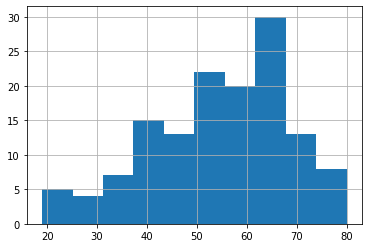

In [57]:
#Redefine Test Data
testData = testDataRemoveMissingValues

#Detect the outliers in "Age" Column using IQR method
q1test = np.percentile(testData['Age'],25)
print("25th Quartile:", q1test)
q3test = np.percentile(testData['Age'],75)
print("75th Quartile:", q3test)
IQRtest = q3test - q1test
uppertest = q3test + (1.5*IQRtest)
lowertest = q1test - (1.5*IQRtest)
upperOutliersTest = np.where(testData.loc[:,"Age"]>=uppertest)
print("Rows with observations above Upper Bound:", upperOutliersTest)
lowerOutliersTest = np.where(testData.loc[:,"Age"]<=lowertest)
print("Rows withg observations below lower Bound:", lowerOutliersTest)
outliersTest = np.append(upperOutliersTest[0],list(lowerOutliersTest[0])) 
print("Total Outliers:", len(outliersTest))
print("Outliers in Age Column: ", testData.iloc[outliersTest,1])

#Replace the outliers in "Age" using Quantile based flooring and capping
twentyfifth_percentileTest = np.percentile(testData['Age'], 25)
seventyfifth_percentileTest = np.percentile(testData['Age'], 75)
testData.iloc[list(lowerOutliersTest[0]),1] = 0
testData.iloc[list(upperOutliersTest[0]),1] = 0
testData.iloc[list(lowerOutliersTest[0]),1] = twentyfifth_percentileTest
testData.iloc[list(upperOutliersTest[0]),1] = seventyfifth_percentileTest

#Age Variable Distribution
(testData['Age']).hist()

Generating dummy variables for categorical and ordinal variables using one hot encoding

In [58]:
#Defining the Features and Response arrays
Xtest = testData.drop(["Severity"],axis=1)
Ytest = testData["Severity"]
Xtest.head()

,BI_RADS,Age,Shape,Margin,Mass_Density
0,5,65.0,lobular,ill-defined,low
1,5,74.0,lobular,microlobulated,low
3,4,57.0,irregular,ill-defined,fat-containing
4,4,76.0,lobular,microlobulated,low
5,4,63.0,round,ill-defined,low


In [59]:
# Generate dummy variables for BI_RADS
Xtest["BI_RADS"] = (Xtest["BI_RADS"]).astype('float')
biradsTest = pd.get_dummies(Xtest["BI_RADS"],prefix="BI_RADS")
biradsTest.head()

,BI_RADS_0.0,BI_RADS_2.0,BI_RADS_3.0,BI_RADS_4.0,BI_RADS_5.0,BI_RADS_6.0
0,0,0,0,0,1,0
1,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0


In [60]:
# Generate dummy variables for Shape
shapeTest = pd.get_dummies(Xtest["Shape"],prefix="shape")
shapeTest.head()

,shape_irregular,shape_lobular,shape_oval,shape_round
0,0,1,0,0
1,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,0,1


In [61]:
# Generate dummy variables for Margin
marginTest = pd.get_dummies(Xtest["Margin"],prefix="margin")
marginTest.head()

,margin_circumscribed,margin_ill-defined,margin_microlobulated,margin_obscured,margin_spiculated
0,0,1,0,0,0
1,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0


In [62]:
# Generate dummy variables for Mass_density
massDensityTest = pd.get_dummies(Xtest["Mass_Density"],prefix="mass_density")
massDensityTest.head()

,mass_density_fat-containing,mass_density_high,mass_density_iso,mass_density_low
0,0,0,0,1
1,0,0,0,1
3,1,0,0,0
4,0,0,0,1
5,0,0,0,1


In [63]:
#Combining all the columns
XtestCombine = pd.concat([biradsTest,Xtest["Age"],shapeTest,marginTest,massDensityTest],axis=1)
XtestCombine.head()

,BI_RADS_0.0,BI_RADS_2.0,BI_RADS_3.0,BI_RADS_4.0,BI_RADS_5.0,BI_RADS_6.0,Age,shape_irregular,shape_lobular,shape_oval,shape_round,margin_circumscribed,margin_ill-defined,margin_microlobulated,margin_obscured,margin_spiculated,mass_density_fat-containing,mass_density_high,mass_density_iso,mass_density_low
0,0,0,0,0,1,0,65.0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,74.0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,57.0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,1,0,0,76.0,0,1,0,0,0,0,1,0,0,0,0,0,1
5,0,0,0,1,0,0,63.0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [64]:
#Based on Feature Selection, picking the BestFeatures for test Data
XtestBest = XtestCombine[BestFeatures]
XtestBest.head()

,BI_RADS_2.0,BI_RADS_3.0,BI_RADS_4.0,BI_RADS_5.0,Age,shape_irregular,shape_oval,shape_round,margin_circumscribed,margin_ill-defined,margin_obscured,margin_spiculated,mass_density_iso
0,0,0,0,1,65.0,0,0,0,0,1,0,0,0
1,0,0,0,1,74.0,0,0,0,0,0,0,0,0
3,0,0,1,0,57.0,1,0,0,0,1,0,0,0
4,0,0,1,0,76.0,0,0,0,0,0,0,0,0
5,0,0,1,0,63.0,0,0,1,0,1,0,0,0


In [65]:
#Scale the Age features between 0 and 1
#Normalizing the age values between 0 and 1, since the values of all other columns is in between 0 and 1
scaler = MinMaxScaler()
XtestBestFit=scaler.fit(XtestBest)
XtestBestScaled = scaler.transform(XtestBest)
pd.DataFrame(XtestBestScaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.754098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.901639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.622951,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.934426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.721311,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [66]:
#Predictions using the model
Y_test_predictGBFinal = modelGBFinal.predict(XtestBestScaled)
testAccuracyScoreGBFinal = balanced_accuracy_score(Ytest, Y_test_predictGBFinal)
print("Test Accuracy: ", testAccuracyScoreGBFinal*100,"%")

Test Accuracy:  80.12820512820514 %


# Model Evaluation

C:\Users\3501\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


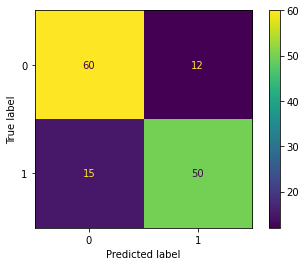

In [67]:
#Print Confusion Matrix
plot_confusion_matrix(modelGBFinal, XtestBestScaled, Ytest)
#plt.savefig("D:/FedEx Problem Statement/Images/confusion_matrix.jpg")

In [68]:
#Print Classification Report
print(classification_report(Ytest, Y_test_predictGBFinal))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        72
           1       0.81      0.77      0.79        65

    accuracy                           0.80       137
   macro avg       0.80      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137



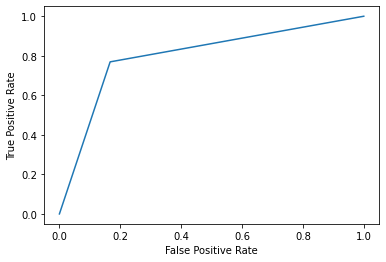

In [69]:
#ROC Curve
fpr, tpr,_= roc_curve(Ytest, Y_test_predictGBFinal)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#plt.savefig("D:/FedEx Problem Statement/Images/roc_curve.jpg")

In [70]:
#Area under curve
print("AUC:",roc_auc_score(Ytest, Y_test_predictGBFinal)*100)

AUC: 80.12820512820514
